In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('E_D_NoisySet')
df=df.drop(df.columns[[0 , -1 , -2]] , 1)

In [4]:
#Levenshtein Distance    
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")       

0.1_TypoD
row:  0
s1:  ZJanuary
s2:  January
LD : 1


s1:  ZJanuary
s2:  April
LD : 8


s1:  ZJanuary
s2:  June
LD : 6


s1:  ZJanuary
s2:  August
LD : 7


s1:  ZJanuary
s2:  September
LD : 9


s1:  ZJanuary
s2:  November
LD : 8


Best Match:  January
ld_best:  1
*******
row:  1
s1:  Augus
s2:  January
LD : 6


s1:  Augus
s2:  April
LD : 4


s1:  Augus
s2:  June
LD : 4


s1:  Augus
s2:  August
LD : 1


s1:  Augus
s2:  September
LD : 9


s1:  Augus
s2:  November
LD : 8


Best Match:  August
ld_best:  1
*******
row:  2
s1:  Janury
s2:  January
LD : 1


s1:  Janury
s2:  April
LD : 6


s1:  Janury
s2:  June
LD : 4


s1:  Janury
s2:  August
LD : 5


s1:  Janury
s2:  September
LD : 9


s1:  Janury
s2:  November
LD : 8


Best Match:  January
ld_best:  1
*******
row:  3
s1:  Novemkber
s2:  January
LD : 9


s1:  Novemkber
s2:  April
LD : 9


s1:  Novemkber
s2:  June
LD : 8


s1:  Novemkber
s2:  August
LD : 9


s1:  Novemkber
s2:  September
LD : 5


s1:  Novemkber
s2:  November
LD : 1


Best Mat

In [6]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.941666666667
LD Accuracy :  0.775
LD Accuracy :  0.775
LD Accuracy :  0.791666666667
LD Accuracy :  0.691666666667
[1.0, 1.0, 1.0, 0.94166666666666665, 0.77500000000000002, 0.77500000000000002, 0.79166666666666663, 0.69166666666666665]


In [7]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 ]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoD_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoD_LD'].iat[x]
diff

Original Transformation_0.1 Transformation_0.2 Transformation_0.3  \
0      January                                                            
1       August                                                            
2      January                                                            
3     November                                                            
4        April                                                            
5        April                                                            
6         June                                                            
7     November                                                            
8      January                                                            
9       August                                                            
10    November                                                            
11        June                                                            
12        June                                                            
13   September                                                            
14      August                                                            
15       April                                                            
16      August                                                            
17        June                                                            
18    November                                                            
19    November                                                            
20        June                                                            
21    November                                                            
22     January                                                            
23    November                                                            
24     January                                                            
25   September                                                            
26       April                                                            
27       April                                                            
28       April                                                            
29     January                                                            
..         ...                ...                ...                ...   
91      August                                                            
92    November                                                            
93   September                                                            
94       April                                                            
95       April                                                            
96   September                                                            
97     January                                                            
98        June                                                            
99   September                                                            
100     August                                                            
101    January                                                            
102      April                                                            
103      April                                                            
104       June                                                            
105    January                                                            
106      April                                                            
107   November                                                            
108       June                                                            
109      April                                                            
110    January                                                            
111     August                                                            
112  September                 

In [8]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoD_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_Percent')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoD'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.4_Percent
September To June
Noisy form: Seteb


September To June
Noisy form: Sepme


September To June
Noisy form: Sembe


September To June
Noisy form: tmber


September To June
Noisy form: Smber


September To April
Noisy form: Spmer


September To June
Noisy form: pmber


********
0.5_Percent
August To June
Noisy form: Aut


November To September
Noisy form: elrenber


November To June
Noisy form: oemr


August To June
Noisy form: ugu


November To June
Noisy form: oebe


November To June
Noisy form: over


January To June
Noisy form: nur


January To June
Noisy form: nur


September To June
Noisy form: Stmb


November To June
Noisy form: Nvbe


August To June
Noisy form: Aus


August To June
Noisy form: ust


November To June
Noisy form: Noem


September To June
Noisy form: Sepe


September To June
Noisy form: tmbr


November To June
Noisy form: Noee


September To June
Noisy form: Seem


September To June
Noisy form: etee


August To June
Noisy form: Aus


August To June
Noisy 

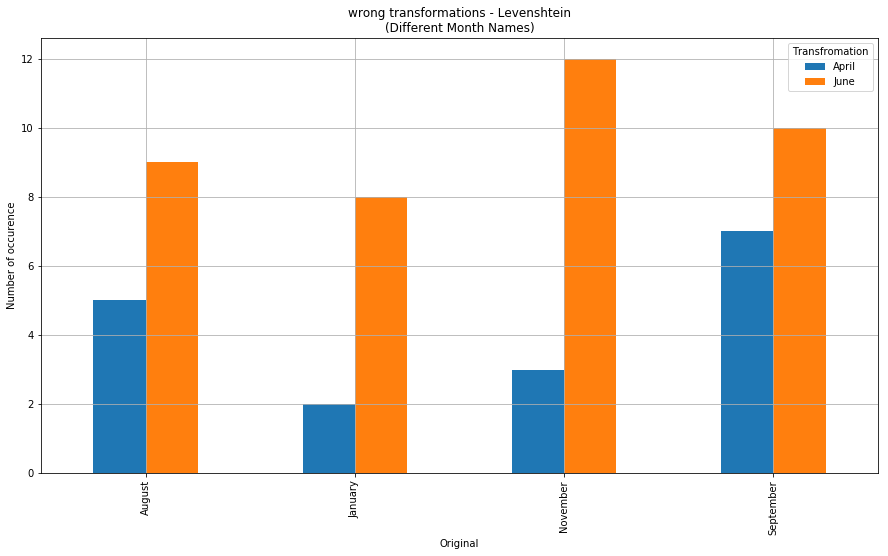

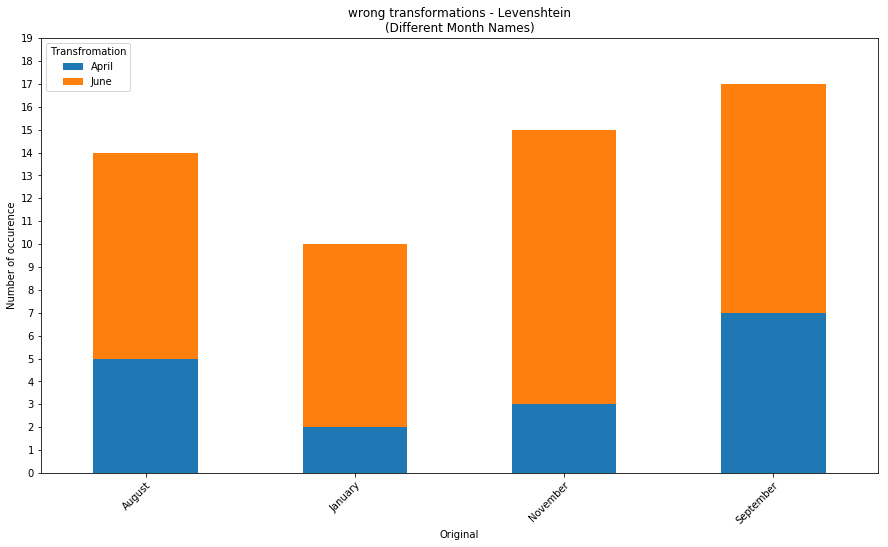

In [9]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

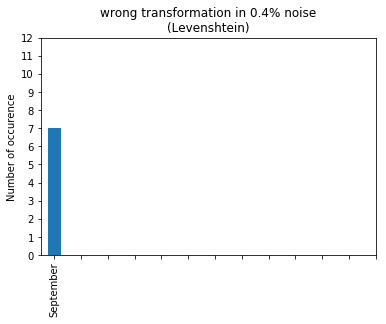

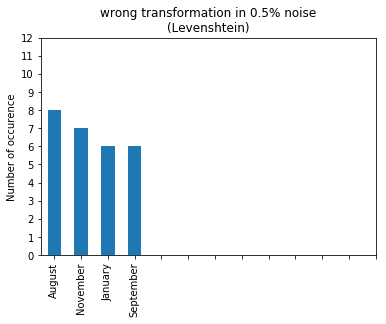

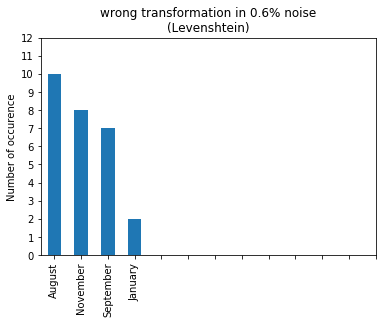

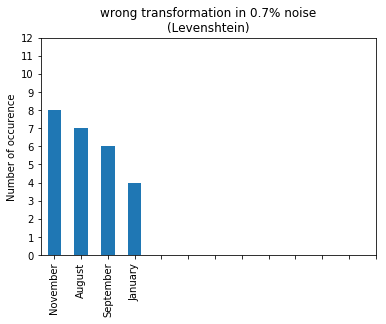

In [10]:
import numpy as np

#Iterate ove the transformed columns 
for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoD_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoD'] = ''
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoD'].iat[x] = df[str(p) + '_TypoD'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoD_LD'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise\n(Levenshtein)'.format(p))
        plt.xticks(range(0,13))
        plt.show()

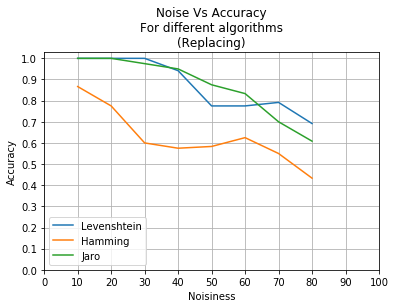

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70,80]
yLD=LdAccuracy
yHamming=[0.8666666666666667, 0.77500000000000002, 0.59999999999999998, 0.57499999999999996, 0.58333333333333337, 0.625, 0.55000000000000004, 0.43333333333333335]
yJaro=[1.0, 1.0, 0.97499999999999998, 0.94999999999999996, 0.875, 0.83333333333333337, 0.69999999999999996, 0.60833333333333328]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Replacing)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()